In [1]:
import random
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations, groupby

In [2]:
# You can use this function to generate a random graph with 'num_of_nodes' nodes
# and 'completeness' probability of an edge between any two nodes
# If 'directed' is True, the graph will be directed
# If 'draw' is True, the graph will be drawn
def gnp_random_connected_graph(num_of_nodes: int,
                               completeness: int,
                               directed: bool = False,
                               draw: bool = False):
    """
    Generates a random graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted (in case of undirected graphs)
    """

    
    if directed:
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    edges = combinations(range(num_of_nodes), 2)
    G.add_nodes_from(range(num_of_nodes))
    
    for _, node_edges in groupby(edges, key = lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        if random.random() < 0.5:
            random_edge = random_edge[::-1]
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < completeness:
                G.add_edge(*e)
                
    for (u,v,w) in G.edges(data=True):
        w['weight'] = random.randint(-5, 20)
                
    if draw: 
        plt.figure(figsize=(10,6))
        if directed:
            # draw with edge weights
            pos = nx.arf_layout(G)
            nx.draw(G,pos, node_color='lightblue', 
                    with_labels=True,
                    node_size=500, 
                    arrowsize=20, 
                    arrows=True)
            labels = nx.get_edge_attributes(G,'weight')
            nx.draw_networkx_edge_labels(G, pos,edge_labels=labels)
            
        else:
            nx.draw(G, node_color='lightblue', 
                with_labels=True, 
                node_size=500)
        
    return G

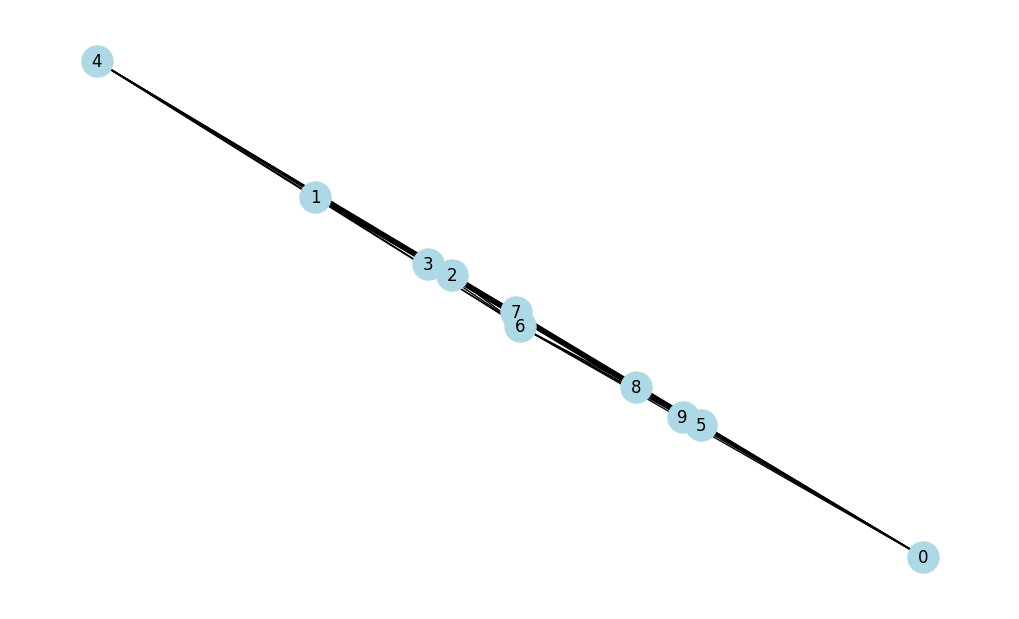

In [4]:
G = gnp_random_connected_graph(10, 1, False, True)

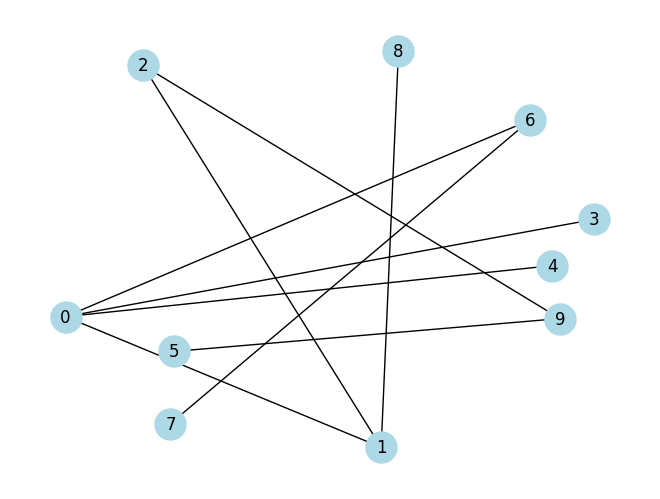

In [5]:
# Kruskal algorithm
def kruskal(graph):
    # get all the edges and their weights
    edges = [((x[0], x[1]), x[-1]['weight']) for x in graph.edges(data=True)]
    # sort them by weight
    edges.sort(key = lambda x: x[1])
    
    result = nx.Graph()
    while len(edges) > 1:
        e = edges.pop(0)
        result.add_edge(e[0][0], e[0][1], weight = e[1])
        # check if adding the edge forms a cycle
        try:
            nx.find_cycle(result)
            result.remove_edge(e[0][0], e[0][1])
        except:
            continue
    return result


test = kruskal(G)
nx.draw(test, node_color='lightblue', 
        with_labels=True, 
        node_size=500)

In [ ]:
# Prim algorithm
def prim(graph):
    # get all the edges and their weights
    edges = [((x[0], x[1]), x[-1]['weight']) for x in graph.edges(data=True)]
    nodes = {list(graph.nodes)[0]}

    result = nx.Graph()
    while len(edges) > 1:
        neighbours = sorted([x for x in edges if x[0][0] in nodes or x[0][1] in nodes], key = lambda x: x[1])
        for e in neighbours:
            result.add_edge(e[0][0], e[0][1], weight = e[1])
            edges.remove(e)
            # check if adding the edge forms a cycle
            try:
                nx.find_cycle(result)
                result.remove_edge(e[0][0], e[0][1])
            except:
                nodes.add(e[0][0])
                nodes.add(e[0][1])
                break
    return result


test2 = prim(G)
nx.draw(test2, node_color='lightblue', 
        with_labels=True, 
        node_size=500)